In [11]:
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [14]:
df.target.value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

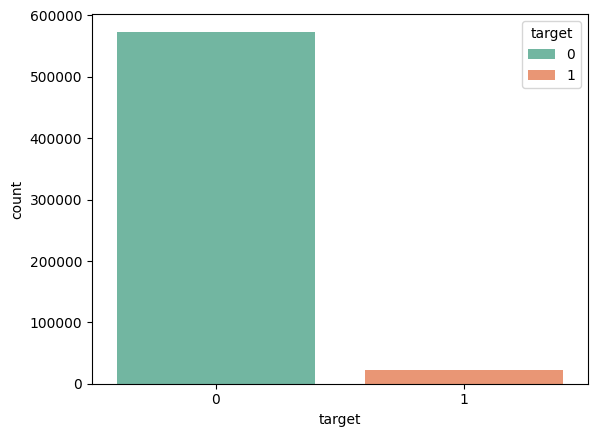

In [33]:
sns.countplot(data=df,x='target',hue='target',palette='Set2')

*Imbalanced targets,suggests highly unbalanced dataset.
Unbalance datasets relates to metrics used to evaluate models will be misleading.
In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.*

*In other words, we will always get high accuracy of the model, which is false. You can also check the confusion matrix of the imbalanced dataset*

# Resampling

*A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).*

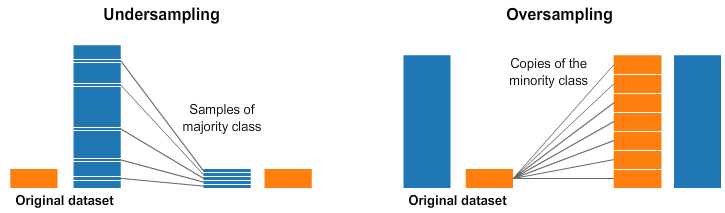

*The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.*

In [17]:
# saving counts in variables
class_count_0, class_count_1 = df.target.value_counts()

# create a dataframe for 2 different target classes
df_class_0 = df[df['target']==0]
df_class_1 = df[df['target']==1]


# Under-sampling

<Axes: xlabel='target', ylabel='count'>

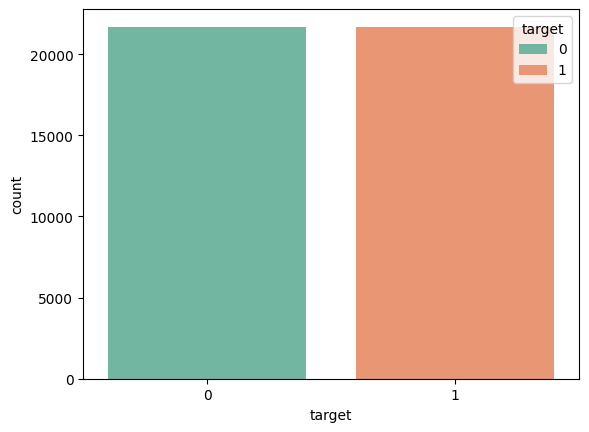

In [ ]:
df_class_0_under = df_class_0.sample(n=class_count_1)
df_under_sample = pd.concat([df_class_0_under,df_class_1],axis=0)
sns.countplot(data=df_under_sample,x='target',hue='target',palette='Set2')

In [30]:
df_under_sample.target.value_counts()

target
0    21694
1    21694
Name: count, dtype: int64

# Over-Sampling

<Axes: xlabel='target', ylabel='count'>

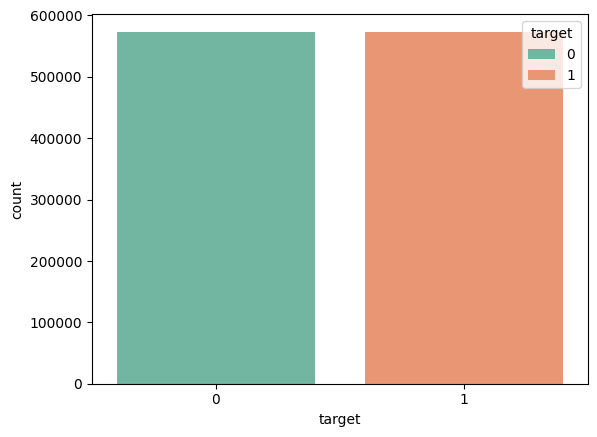

In [35]:
df_class_1_over = df_class_1.sample(n=class_count_0, replace=True)
df_over_sample = pd.concat([df_class_0,df_class_1_over],axis=0)
sns.countplot(data=df_over_sample,x='target',hue='target',palette='Set2')